In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import *
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.decomposition import PCA

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
names=[]
for i in range(1,16):
    names.append(f'A{i}')

names.append('Class')

# dataset has missing values - '?'
df = pd.read_csv('crx.data', sep=',', names=names, na_values='?')
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [4]:
df['Class'] = df['Class'].replace({'-':0, '+':1})
df['Class'] = df['Class'].astype(str)
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  Class   690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [6]:
df.describe(include='all')

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
count,678,678.000000,690.000000,684,684,681,681,690.000000,690,690,690.00000,690,690,677.000000,690.000000,690
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,NaN,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,0
freq,468,NaN,NaN,519,519,137,399,NaN,361,395,NaN,374,625,NaN,NaN,383
mean,NaN,31.568171,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,184.014771,1017.385507,NaN
std,NaN,11.957862,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,173.806768,5210.102598,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,22.602500,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,75.000000,0.000000,NaN
50%,NaN,28.460000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,160.000000,5.000000,NaN
75%,NaN,38.230000,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,276.000000,395.500000,NaN


Additional Variable Information\
A1:b, a.\
A2:continuous.\
A3:continuous.\
A4:u, y, l, t.\
A5:g, p, gg.\
A6:c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.\
A7:v, h, bb, j, n, z, dd, ff, o.\
A8:continuous.\
A9:t, f.\
A10:t, f.\
A11:continuous.\
A12:t, f.\
A13:g, p, s.\
A14:continuous.\
A15:continuous.\
A16: +,-(class attribute)

In [7]:
df.isnull().sum()

A1       12
A2       12
A3        0
A4        6
A5        6
A6        9
A7        9
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14      13
A15       0
Class     0
dtype: int64

In [8]:
df.isnull().any(axis=1).sum()

37

In [9]:
df_cleaned = df.copy()
df_cleaned['missing_values'] = df_cleaned.isnull().sum(axis=1)
missing_values = df_cleaned[df_cleaned['missing_values'] > 0]

missing_values

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class,missing_values
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,NaN,0,0,1
83,a,NaN,3.500,u,g,d,v,3.000,t,f,0,t,g,300.0,0,0,1
86,b,NaN,0.375,u,g,d,v,0.875,t,f,0,t,s,928.0,0,0,1
92,b,NaN,5.000,y,p,aa,v,8.500,t,f,0,f,g,0.0,0,0,1
97,b,NaN,0.500,u,g,c,bb,0.835,t,f,0,t,s,320.0,0,0,1
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,NaN,600,1,1
206,a,71.58,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,NaN,0,1,5
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,NaN,26726,1,1
248,NaN,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,73.0,444,1,1
254,b,NaN,0.625,u,g,k,v,0.250,f,f,0,f,g,380.0,2010,0,1


In [10]:
missing_values_threshold = np.ceil((len(df.columns) - 1) * 0.33)
missing_values_threshold

5.0

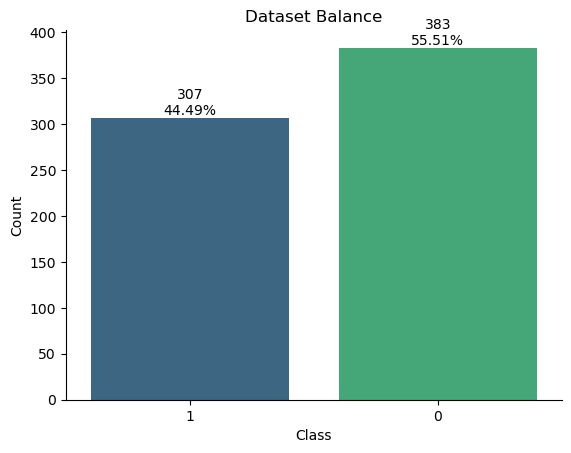

In [11]:
fig, ax = plt.subplots()

ax = sns.countplot(x=df['Class'], data=df, palette='viridis')
    
total = len(df)
    
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    text = f'{p.get_height():.0f}\n{percentage}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, text, ha='center', va='bottom')
        
ax.set_title(f'Dataset Balance')
ax.set_ylabel('Count')

sns.despine()
plt.show()

In [12]:
def plot_distribution_categorical(df):   
    categorical_features = df.select_dtypes(include=np.object_).columns
    categorical_features = categorical_features.drop('Class')
    
    fig, axs = plt.subplots((len(categorical_features) + 1) // 2, 2, figsize=(20, 20), constrained_layout=True)

    axs = axs.flatten()

    for i, col in enumerate(categorical_features):
        sns.countplot(y=col, data=df, ax=axs[i], order=df[col].value_counts().index, palette='viridis')
        axs[i].set_title(f'Distribution of {col}')
        axs[i].set_xlabel(col.capitalize())
        axs[i].set_ylabel('Count')

    # removing uneccessary (sub)plots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.show()

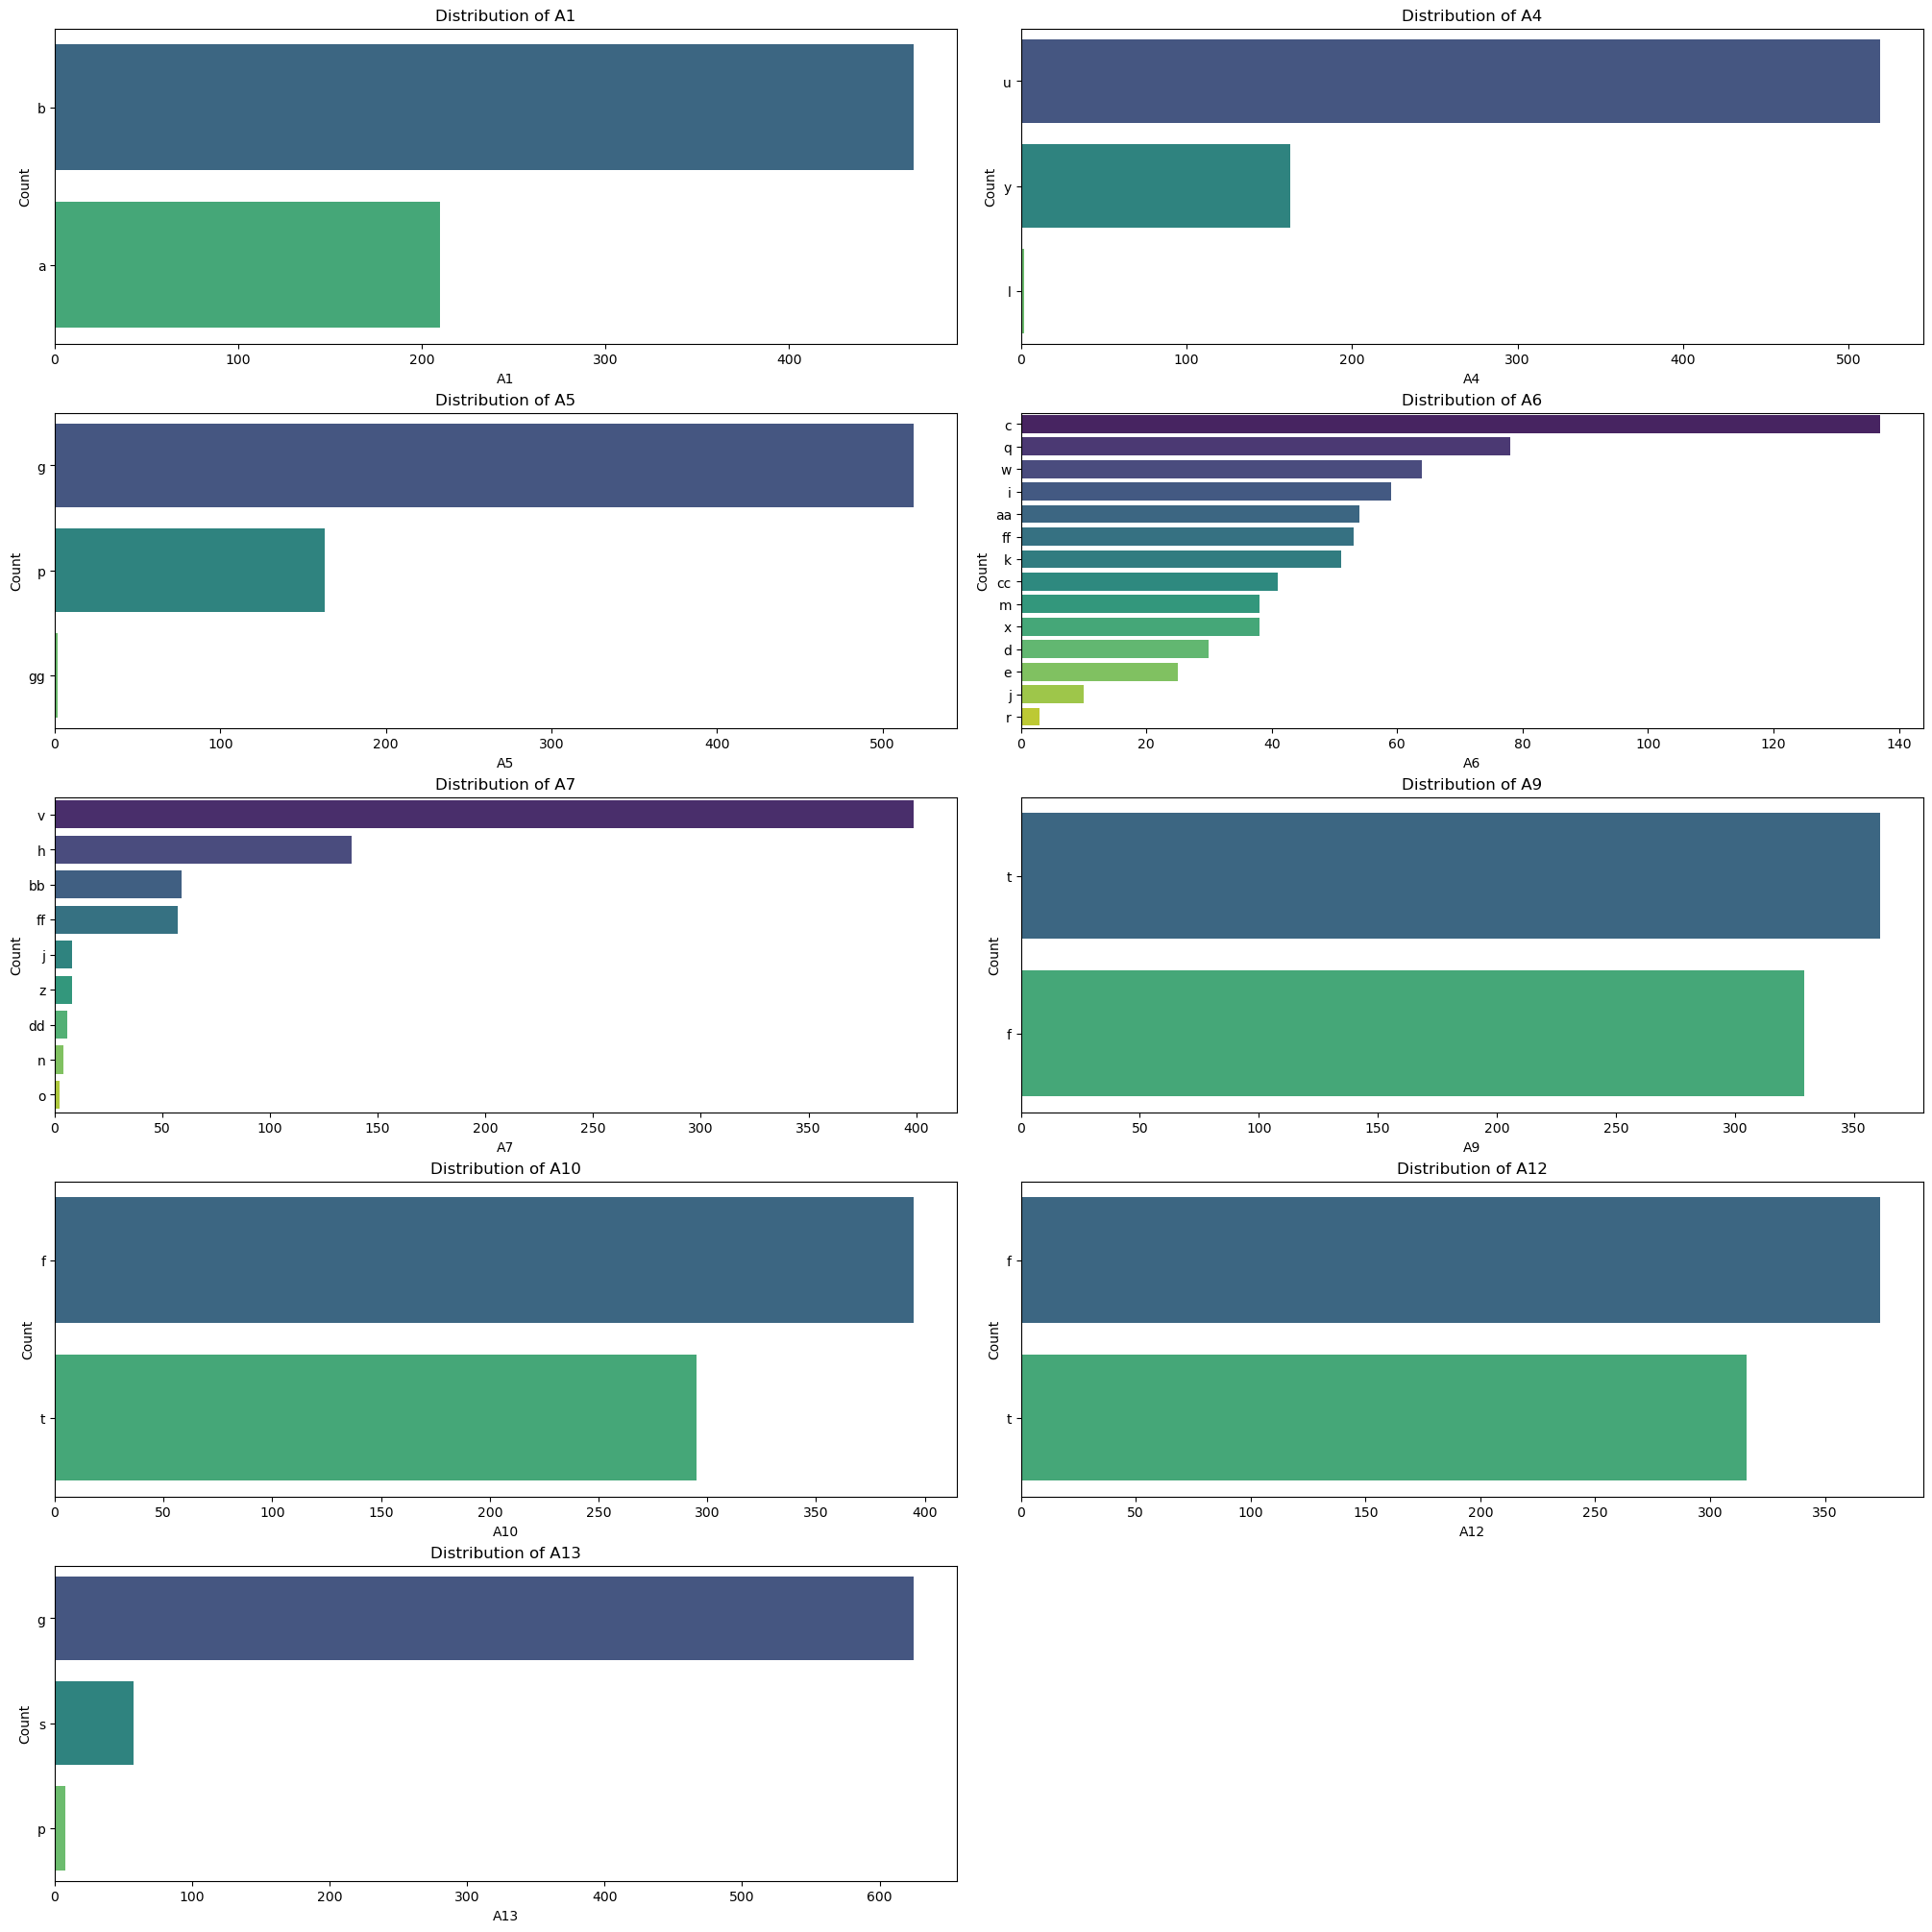

In [13]:
plot_distribution_categorical(df)

In [14]:
def plot_distribution_categorical_percentages(df):    
    categorical_features = df.select_dtypes(include=np.object_).columns
    categorical_features = categorical_features.drop('Class')
    
    fig, axs = plt.subplots(len(categorical_features), 1, figsize=(15, len(categorical_features) * 5), constrained_layout=True)

    for i, col in enumerate(categorical_features):

        ax = sns.countplot(x=col, hue='Class', data=df, ax=axs[i], order=df[col].value_counts().index, palette='viridis')

        total = len(df)

        for p in ax.patches:
            percentage = f'{100 * p.get_height() / total:.2f}%'
            text = f'{p.get_height():.0f}\n{percentage}'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.text(x, y, text, ha='center', va='bottom')

        axs[i].set_title(f'Distribution of {col}')
        axs[i].set_xlabel(col.capitalize())
        axs[i].set_ylabel('Count')

    # removing uneccessary (sub)plots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
        
    sns.despine()
    plt.show()

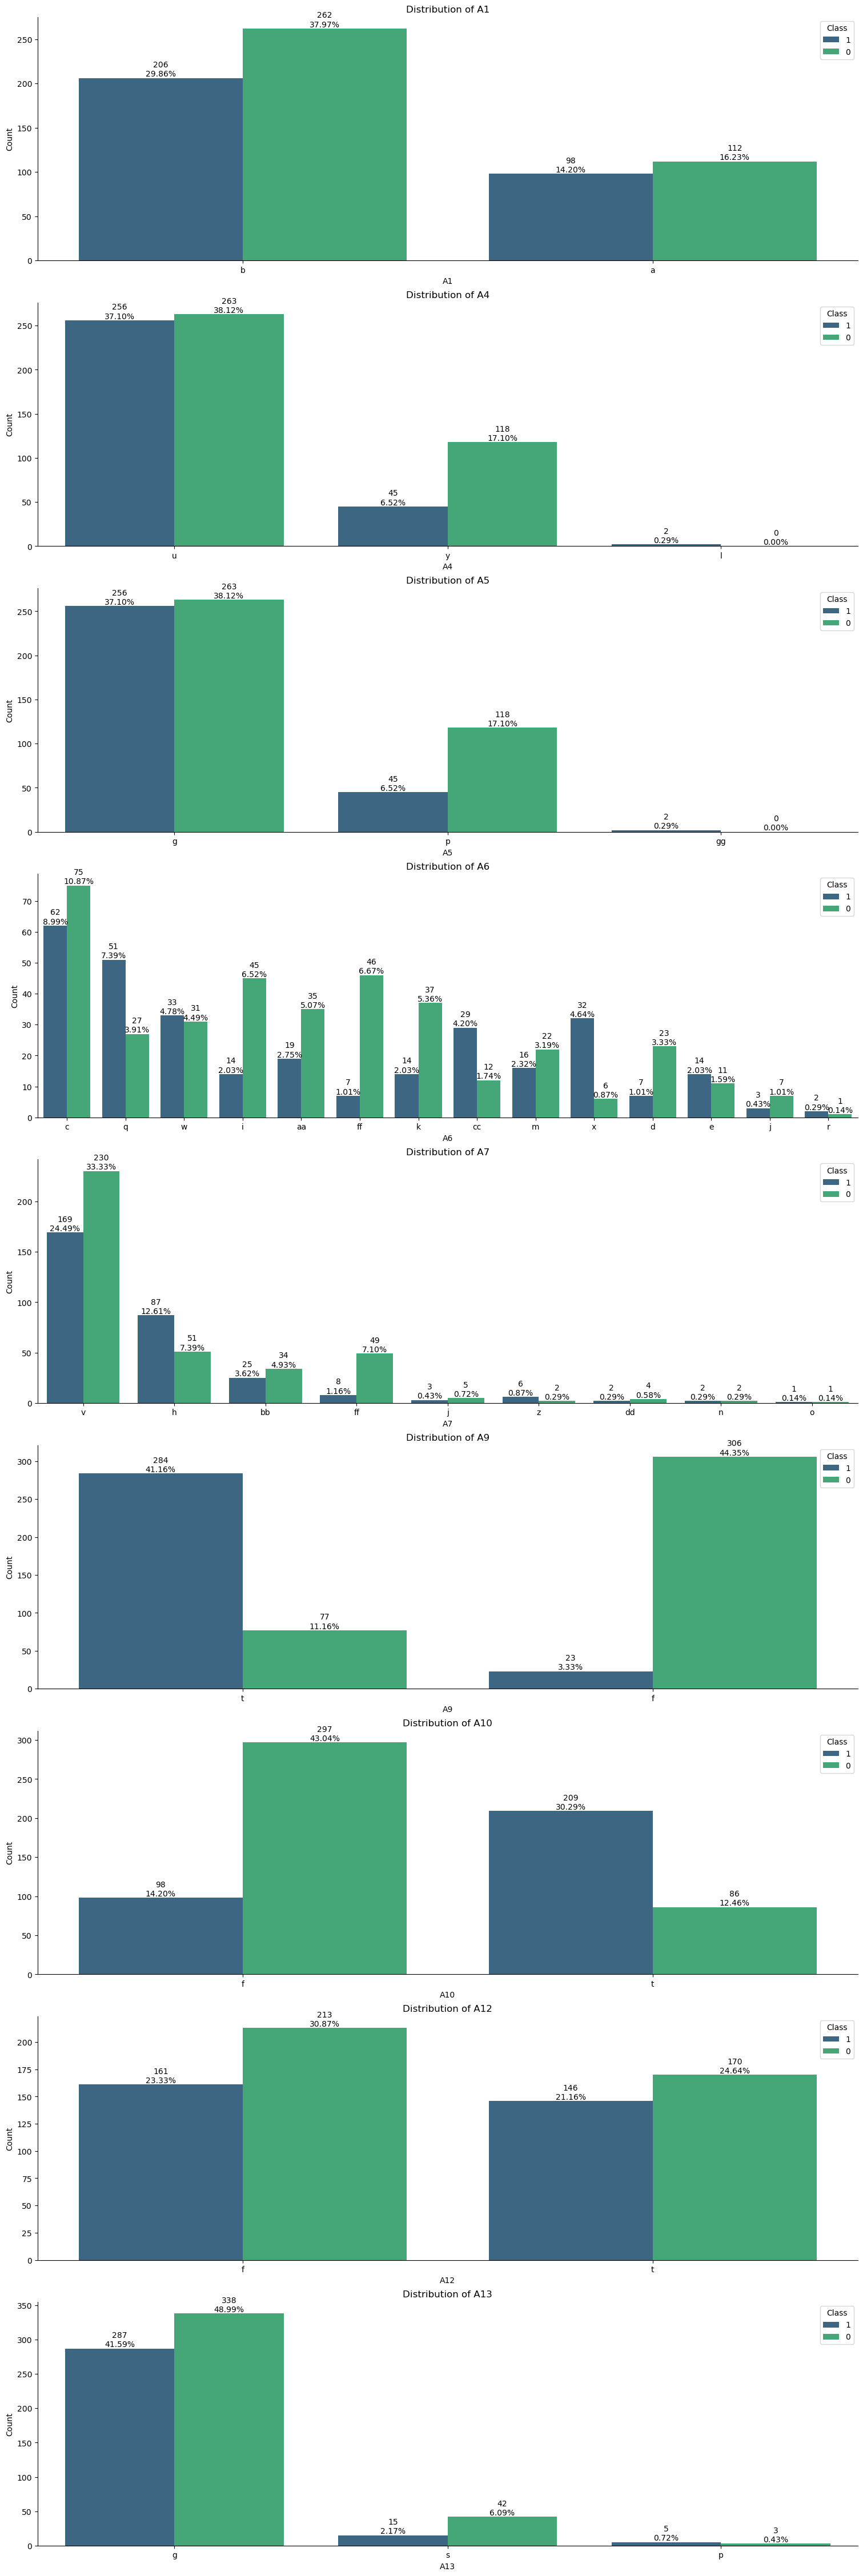

In [15]:
plot_distribution_categorical_percentages(df)

In [16]:
def plot_distribution_numerical(df):    
    numerical_features = df.select_dtypes(include=np.number).columns
    num_features = len(numerical_features)
    num_cols = 2
    num_rows = (num_features + num_cols - 1) // num_cols

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20), constrained_layout=True)
    axs = axs.flatten()
    
    for i, col in enumerate(numerical_features):                        

        ax = sns.histplot(x=col, hue='Class', data=df, ax=axs[i], palette='viridis', kde=True, bins=40, multiple='stack')      
        axs[i].set_title(f'Distribution of {col}')
        axs[i].set_xlabel(col.capitalize())
        axs[i].set_ylabel('Count')

    # removing uneccessary (sub)plots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    plt.show()

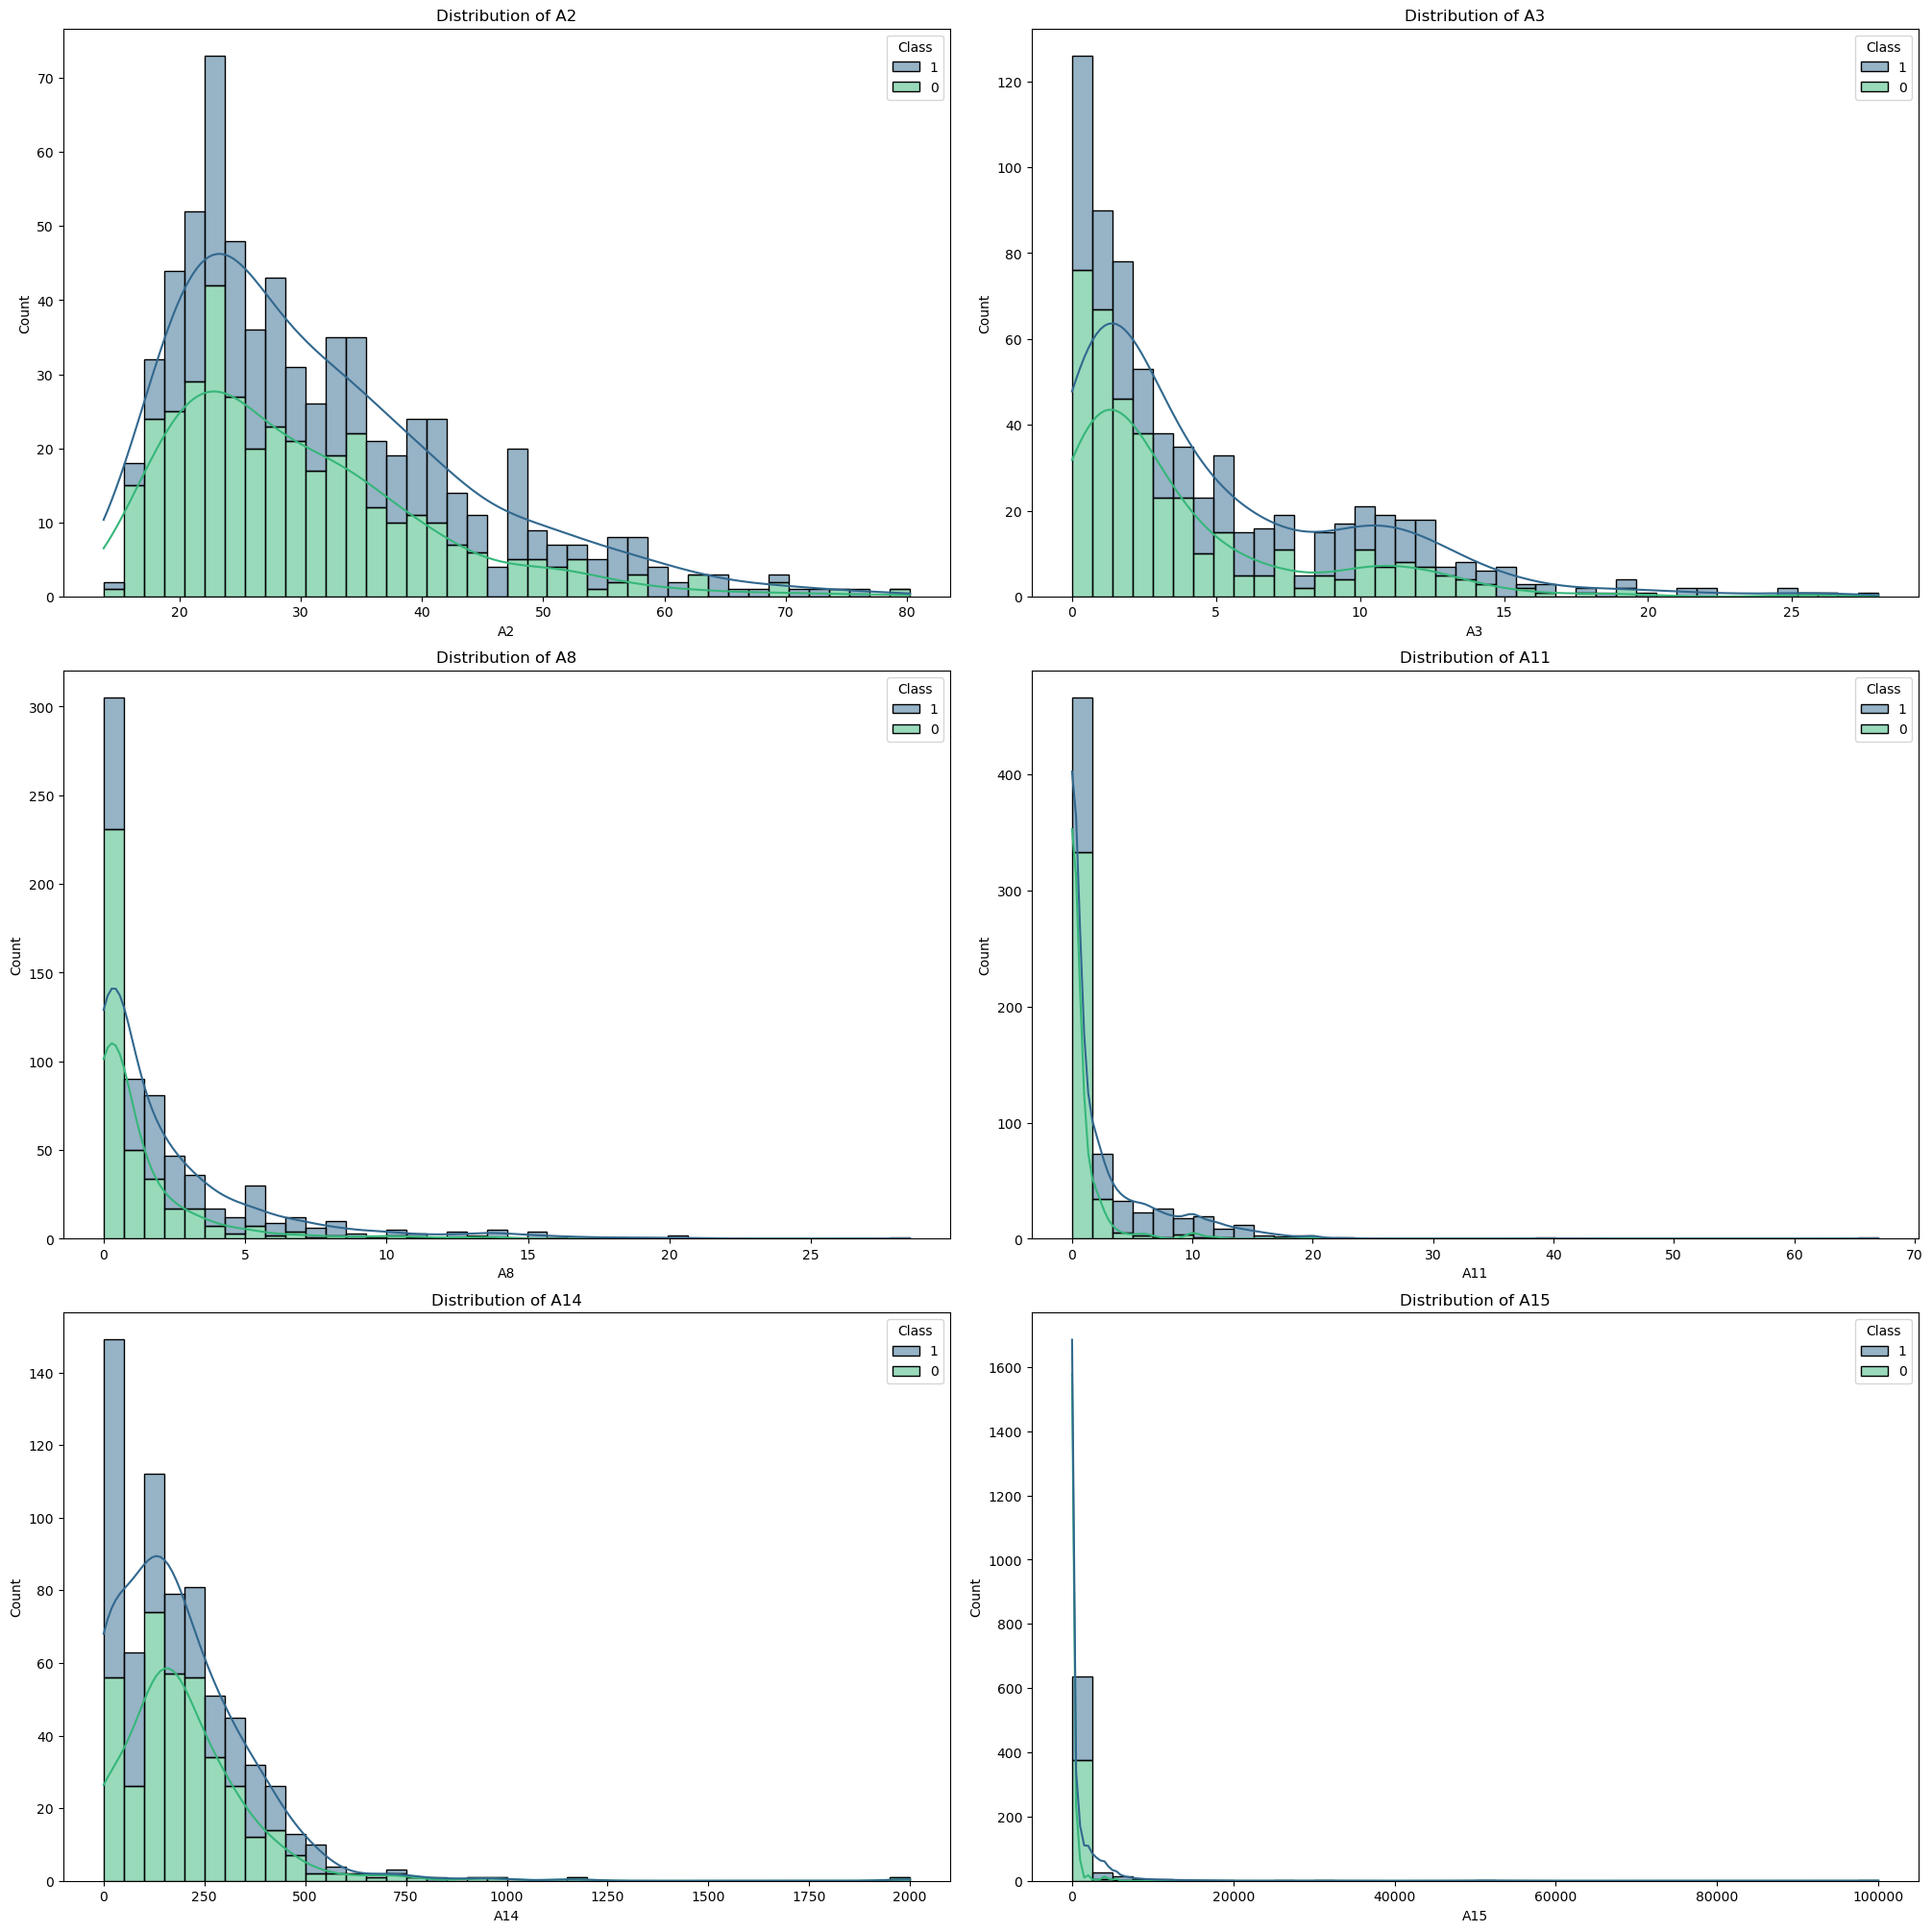

In [17]:
plot_distribution_numerical(df)

In [18]:
def plot_outliers(df):
    numerical_features = df.select_dtypes(include=np.number).columns
    num_features = len(numerical_features)
    num_cols = 2
    num_rows = (num_features + num_cols - 1) // num_cols

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 20), constrained_layout=True)
    axs = axs.flatten()
    
    for i, col in enumerate(numerical_features):
        sns.boxplot(y=col, x='Class', data=df, ax=axs[i], palette='viridis')
        ax=axs[i].set_title(col.capitalize())

    # removing uneccessary (sub)plots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])  
        
    plt.show()

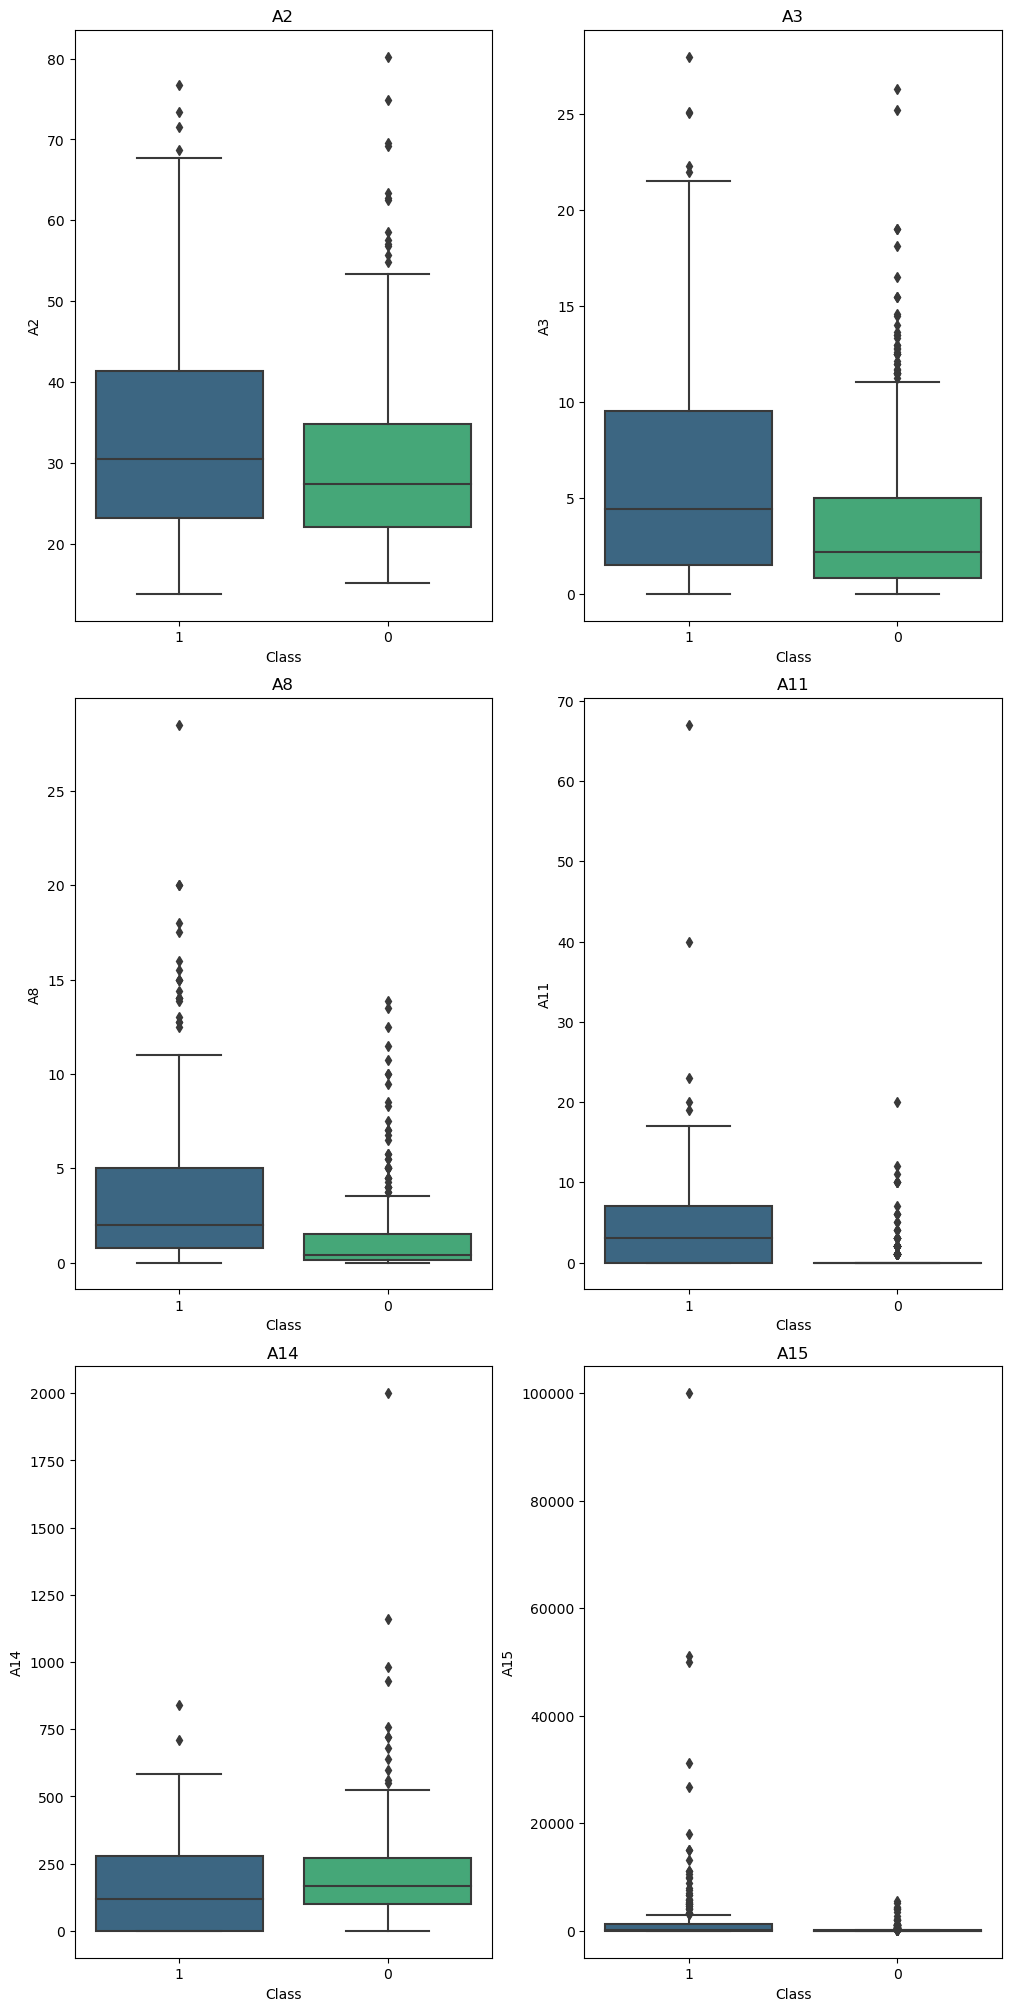

In [19]:
plot_outliers(df)

In [20]:
def outliers_iqr(df):
    numerical_features = df.select_dtypes(include=np.number).columns
    outliers = []

    for col in numerical_features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outliers.extend(outliers_col)
        
    outliers = list(set(outliers))
    
    return outliers

In [21]:
len(outliers_iqr(df))

216

In [22]:
def outliers_zscore(df, threshold=3):
    numerical_features = df.select_dtypes(include=np.number).columns
    outliers = []

    for col in numerical_features:
        z_scores = zscore(df[col], nan_policy='omit')
        abs_z_scores = np.abs(z_scores)
        
        outliers_col = df[col][abs_z_scores > threshold].index
        outliers.extend(outliers_col)
        
    outliers = list(set(outliers))

    return outliers

In [23]:
len(outliers_zscore(df))

52

# Baseline

Decision Tree: Mean Accuracy = 0.785, Std = 0.028
Random Forest: Mean Accuracy = 0.879, Std = 0.020
SVM: Mean Accuracy = 0.851, Std = 0.019
XGBOOST: Mean Accuracy = 0.860, Std = 0.042
Logistic Regression: Mean Accuracy = 0.877, Std = 0.027
KNN: Mean Accuracy = 0.806, Std = 0.029
   Decision Tree  Random Forest       SVM   XGBOOST  Logistic Regression  \
0       0.828571       0.914286  0.847619  0.895238             0.904762   
1       0.742857       0.866667  0.857143  0.809524             0.857143   
2       0.798077       0.884615  0.875000  0.836538             0.884615   
3       0.778846       0.875000  0.855769  0.923077             0.903846   
4       0.778846       0.855769  0.817308  0.836538             0.836538   

        KNN  
0  0.828571  
1  0.828571  
2  0.817308  
3  0.807692  
4  0.750000  
Decision Tree Test Accuracy: 0.779
Random Forest Test Accuracy: 0.847
SVM Test Accuracy: 0.840
XGBOOST Test Accuracy: 0.863
Logistic Regression Test Accuracy: 0.832
KNN Test Accur

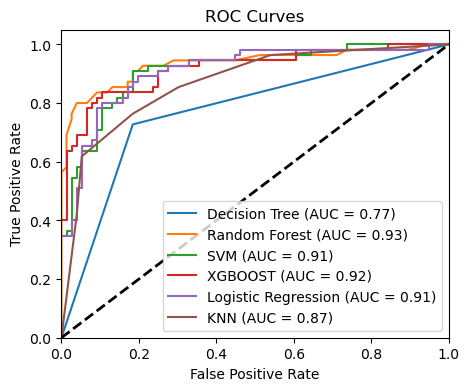

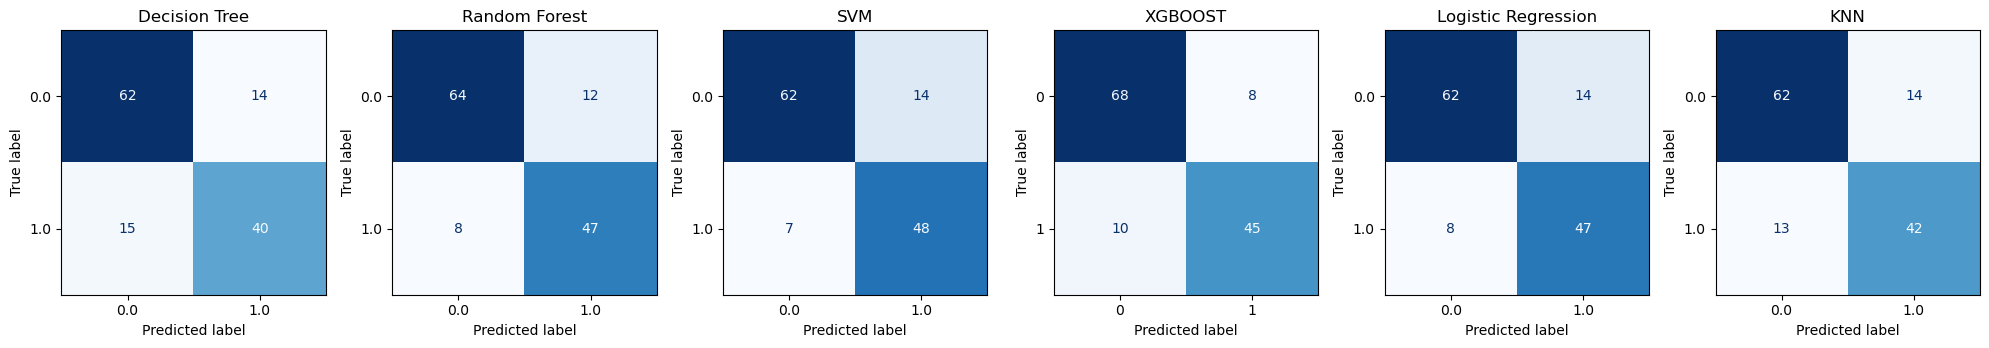

               Decision Tree  Random Forest       SVM   XGBOOST  \
Test Accuracy       0.778626       0.847328  0.839695  0.862595   

               Logistic Regression       KNN  
Test Accuracy             0.832061  0.793893  


In [24]:
df_baseline = df.copy(deep=True)
df_baseline = df_baseline.dropna()
categorical_features = df.select_dtypes(include=np.object_).columns
categorical_features = categorical_features.drop('Class')
df_baseline = pd.get_dummies(df_baseline, columns=categorical_features)

X_baseline = df_baseline.drop('Class', axis = 1)
y_baseline = df_baseline['Class']
y_baseline = y_baseline.astype('Int64')

scaler = StandardScaler()
X_baseline = scaler.fit_transform(X_baseline)

X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X_baseline, y_baseline, test_size=0.2, random_state=42)

decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
xgboost = XGBClassifier()
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier()

models = {
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'SVM': svm,
    'XGBOOST': xgboost,
    'Logistic Regression': logistic_regression,
    'KNN': knn
}

cv_results = {}
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, X_train_baseline, y_train_baseline, cv=kf, scoring='accuracy')
    cv_results[name] = scores
    print(f'{name}: Mean Accuracy = {scores.mean():.3f}, Std = {scores.std():.3f}')

cv_results_df = pd.DataFrame(cv_results)
print(cv_results_df)

test_results = {}
roc_curves = {}

plt.figure(figsize=(5, 4))

for name, model in models.items():
    model.fit(X_train_baseline, y_train_baseline)
    y_pred = model.predict(X_test_baseline)
    accuracy = accuracy_score(y_test_baseline, y_pred)
    test_results[name] = accuracy
    print(f'{name} Test Accuracy: {accuracy:.3f}')
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_baseline)[:, 1]
    else:  # For SVM without probability=True
        y_prob = model.decision_function(X_test_baseline)
        
    fpr, tpr, _ = roc_curve(y_test_baseline, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_curves[name] = (fpr, tpr, roc_auc)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
# Plot all ROC Curves on one graph
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

fig, axes = plt.subplots(1, len(models), figsize=(20, 5))
for ax, (name, model) in zip(axes, models.items()):
    model.fit(X_train_baseline, y_train_baseline)
    y_pred = model.predict(X_test_baseline)
    cm = confusion_matrix(y_test_baseline, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
    ax.set_title(name)

plt.tight_layout()
plt.show()

test_results_baseline_df = pd.DataFrame(test_results, index=['Test Accuracy'])
print(test_results_baseline_df)

Since there are no rows where A4 has value 't' (documentation states that this is one of the categories for this feature), we added a dummy row and filled it with mean for numerical columns and mode for categorical (think it's pointless to use KNN imputer here, also was decided to just add one row and not two - for both target = 0 and 1)

In [25]:
feature_a4 = df['A4']
missing_category_a4 = 't'

# Check if 't' is missing once again
if missing_category_a4 not in feature_a4.unique():
    dummy_row = []
    
    for col in df.columns:
        if col == 'A4':
            dummy_row.append(missing_category_a4)
        else:
            if df[col].dtype == 'object':
                mode = df[col].mode()[0]
                dummy_row.append(mode)
            else:
                mean = df[col].mean()
                dummy_row.append(mean)
                
    dummy_row_df = pd.DataFrame([dummy_row], columns=df.columns)
    
    df = pd.concat([df, dummy_row_df], ignore_index=True)

df.tail(1)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
690,b,31.568171,4.758725,t,g,c,v,2.223406,t,f,2.4,f,g,184.014771,1017.385507,0


Since A3, A8, A11, A14, A15 have a lot of outliers and all of them are positive, skewed as well

In [26]:
log_transform_features = ['A3', 'A8', 'A11', 'A14', 'A15']
for col in log_transform_features:
    minimum = df[col].min()
    df[col] = df[col] - minimum + 1
    df[col] = np.log(df[col])

df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.830000,0.000000,u,g,w,v,0.810930,t,t,0.693147,f,g,5.313206,0.000000,1
1,a,58.670000,1.697449,u,g,q,h,1.396245,t,t,1.945910,f,g,3.784190,6.329721,1
2,a,24.500000,0.405465,u,g,q,h,0.916291,t,f,0.000000,f,g,5.638355,6.715383,1
3,b,27.830000,0.932164,u,g,w,v,1.558145,t,t,1.791759,t,g,4.615121,1.386294,1
4,b,20.170000,1.890850,u,g,w,v,0.996949,t,f,0.000000,f,s,4.795791,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,a,22.670000,0.559616,u,g,c,v,1.098612,f,t,1.098612,t,g,5.303305,5.978886,0
687,a,25.250000,2.674149,y,p,ff,ff,1.098612,f,t,0.693147,t,g,5.303305,0.693147,0
688,b,17.920000,0.186480,u,g,aa,v,0.039221,f,f,0.000000,f,g,5.638355,6.621406,0
689,b,35.000000,1.475907,u,g,c,h,2.228939,f,f,0.000000,t,g,0.000000,0.000000,0


In [27]:
df['Class'] = df['Class'].astype(int)
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputation

In [28]:
numerical_features = df.select_dtypes(include=np.number).columns
numerical_features = numerical_features.drop('Class')
categorical_features = df.select_dtypes(include=np.object_).columns


cat_imputer = SimpleImputer(strategy='most_frequent')
X_train_cat_imputed = pd.DataFrame(cat_imputer.fit_transform(X_train[categorical_features]), columns=categorical_features)
X_test_cat_imputed = pd.DataFrame(cat_imputer.transform(X_test[categorical_features]), columns=categorical_features)

num_imputer = KNNImputer(n_neighbors=5)
X_train_num_imputed = pd.DataFrame(num_imputer.fit_transform(X_train[numerical_features]), columns=numerical_features)
X_test_num_imputed = pd.DataFrame(num_imputer.transform(X_test[numerical_features]), columns=numerical_features)

X_train_imputed = pd.concat([X_train_cat_imputed, X_train_num_imputed], axis=1)
X_test_imputed = pd.concat([X_test_cat_imputed, X_test_num_imputed], axis=1)

# Encoding

Since we don't know if the categories are ordinal or nominal, we will assume they are nominal (mainly for A6 and A7)

In [29]:
one_hot_features = ['A1', 'A4', 'A5', 'A9', 'A10', 'A12', 'A13']
frequency_encode_features = ['A6', 'A7']

X_train_encoded = pd.get_dummies(X_train_imputed, columns=one_hot_features)
X_test_encoded = pd.get_dummies(X_test_imputed, columns=one_hot_features)

X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

for col in frequency_encode_features:
    freq = X_train_encoded[col].value_counts() / len(X_train_encoded)
    X_train_encoded[col] = X_train_encoded[col].map(freq)
    X_test_encoded[col] = X_test_encoded[col].map(freq)

# Correlation Matrix

No highly correlated features, not removing any of them

<Axes: >

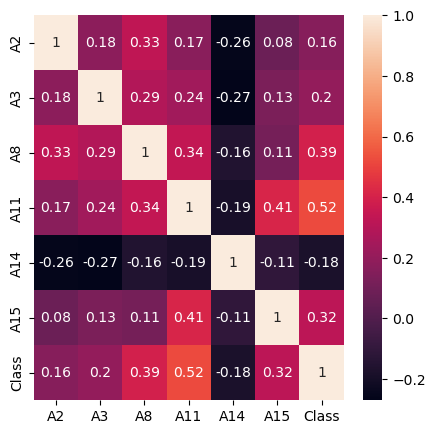

In [30]:
numeric_features_corr = df.select_dtypes(include='number').columns
corr = df[numeric_features_corr].corr().apply(lambda x: round(x, 2))
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data=corr, annot=True, ax=ax)

# Discretization

Also tested without discretization, no difference in performance

In [31]:
kbins_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
X_train_encoded['A2'] = kbins_discretizer.fit_transform(X_train_encoded[['A2']])
X_test_encoded['A2'] = kbins_discretizer.transform(X_test_encoded[['A2']])



# Scaling

In [32]:
scaling_features = ['A2', 'A3', 'A6', 'A7', 'A8', 'A11', 'A14', 'A15']

scaler = StandardScaler()

X_train_encoded[scaling_features] = scaler.fit_transform(X_train_encoded[scaling_features])
X_test_encoded[scaling_features] = scaler.transform(X_test_encoded[scaling_features])


train_df = pd.concat([X_train_encoded, y_train.reset_index(drop=True)], axis=1)
test_df = pd.concat([X_test_encoded, y_test.reset_index(drop=True)], axis=1)
combined_df = pd.concat([train_df, test_df], ignore_index=True)
combined_df.describe()

,A6,A7,A2,A3,A8,A11,A14,A15,Class
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,-0.010503,0.017572,0.011512,0.007584,0.029499,0.007505,0.020715,-0.005481,0.444284
std,1.004664,0.996704,1.006487,1.014274,1.020260,1.003195,0.985887,1.003470,0.497246
min,-1.683374,-1.743912,-1.418710,-1.685740,-1.102290,-0.735638,-1.911625,-0.942374,0.000000
25%,-0.754391,-0.859710,-0.711277,-0.849326,-0.895660,-0.735638,0.049311,-0.942374,0.000000
50%,-0.334851,0.828314,-0.003845,-0.090790,-0.164470,-0.735638,0.425944,-0.378686,0.000000
75%,0.114657,0.828314,0.703588,0.848071,0.640162,0.763383,0.668868,0.941751,1.000000
max,1.792819,0.828314,1.411020,2.377542,3.476750,3.826980,1.585204,2.679598,1.000000


Distribution of numerical columns once again 

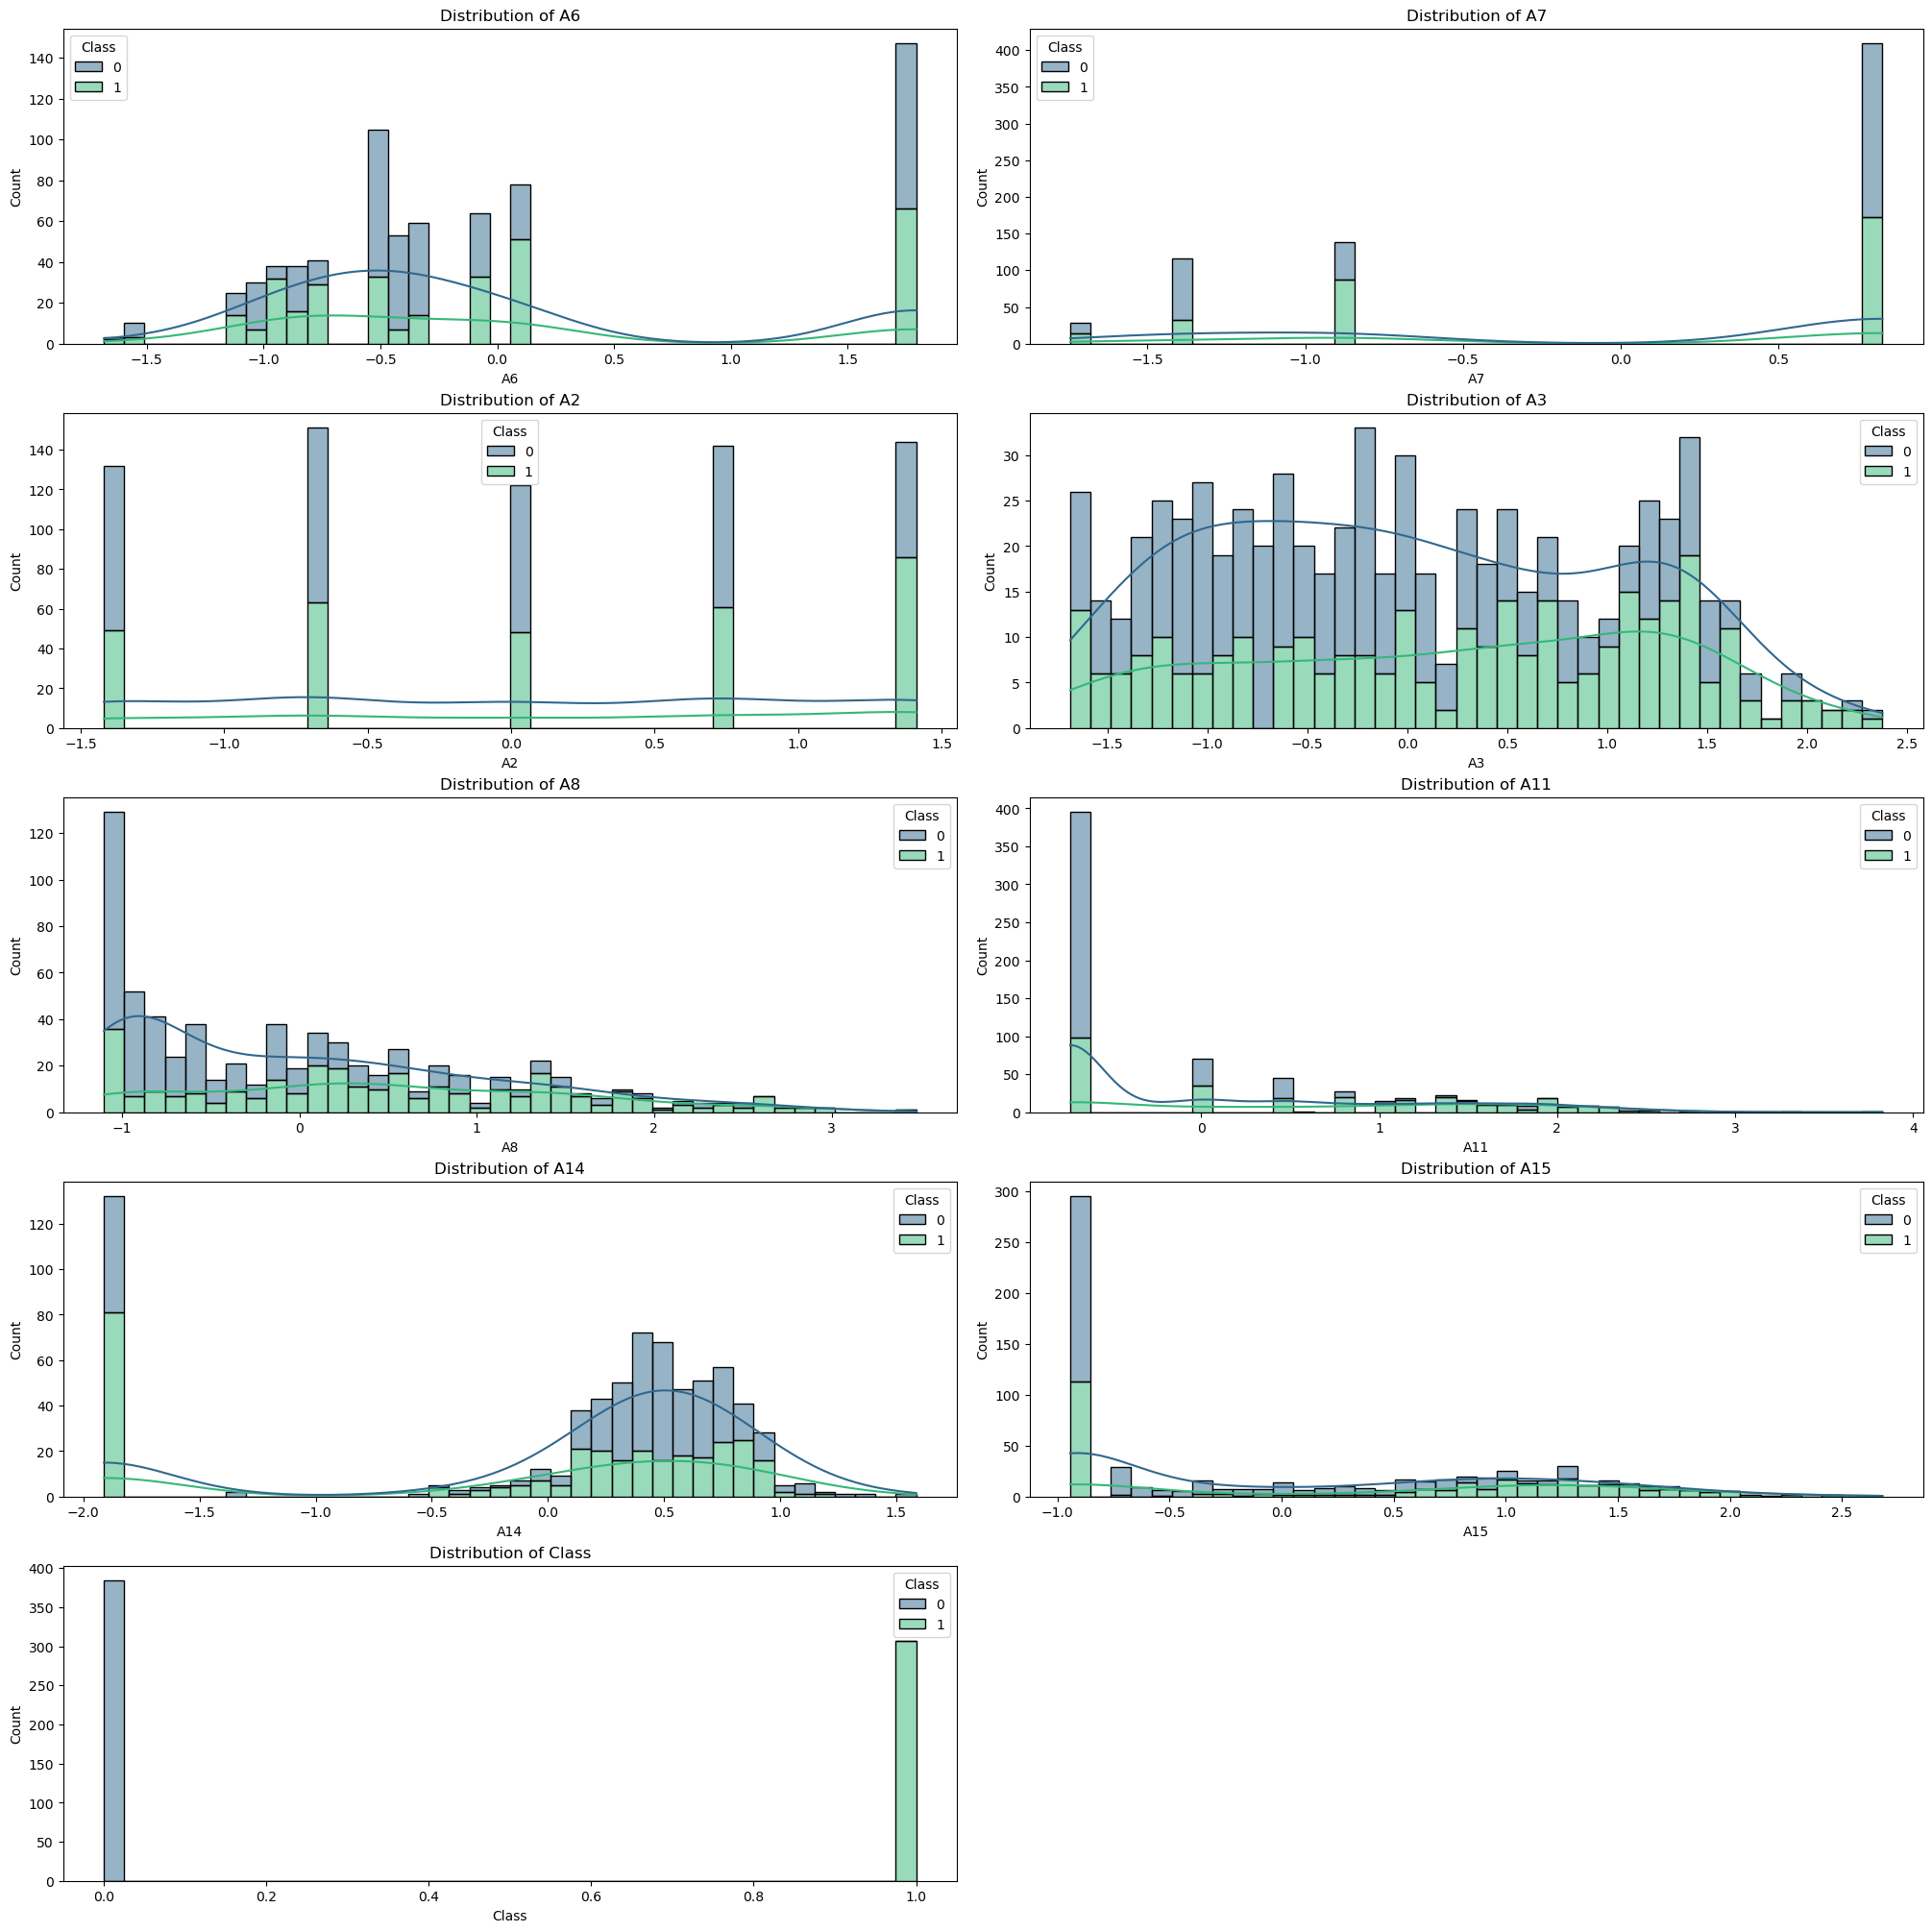

In [33]:
plot_distribution_numerical(combined_df)

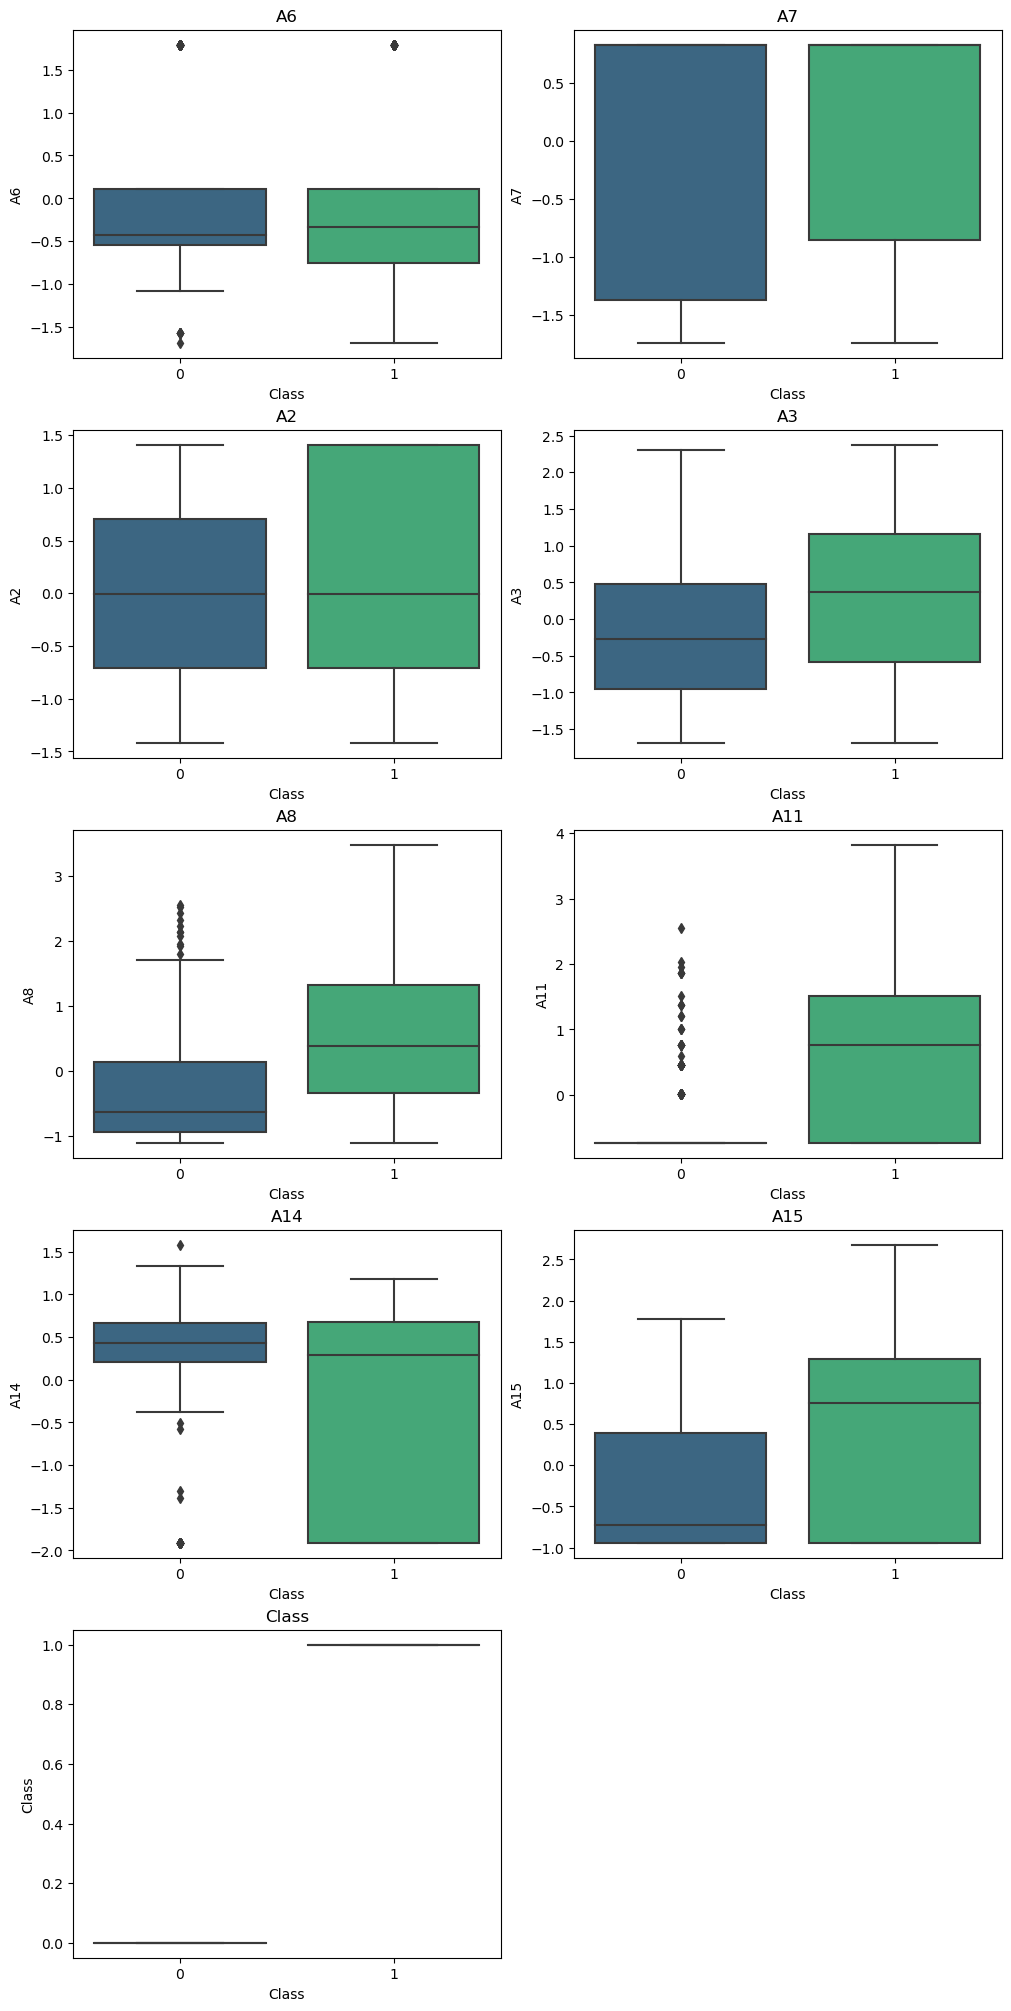

In [34]:
plot_outliers(combined_df)

In [35]:
len(outliers_iqr(combined_df))

249

In [36]:
len(outliers_zscore(combined_df))

2

Decision Tree: Mean Accuracy = 0.810, Std = 0.016
Random Forest: Mean Accuracy = 0.870, Std = 0.041
SVM: Mean Accuracy = 0.850, Std = 0.051
XGBOOST: Mean Accuracy = 0.864, Std = 0.046
Logistic Regression: Mean Accuracy = 0.855, Std = 0.030
KNN: Mean Accuracy = 0.801, Std = 0.047
   Decision Tree  Random Forest       SVM   XGBOOST  Logistic Regression  \
0       0.828829       0.918919  0.918919  0.927928             0.882883   
1       0.801802       0.819820  0.765766  0.810811             0.810811   
2       0.818182       0.845455  0.827273  0.836364             0.827273   
3       0.818182       0.918182  0.863636  0.909091             0.881818   
4       0.781818       0.845455  0.872727  0.836364             0.872727   

        KNN  
0  0.864865  
1  0.738739  
2  0.754545  
3  0.818182  
4  0.827273  
Decision Tree Test Accuracy: 0.791
Random Forest Test Accuracy: 0.892
SVM Test Accuracy: 0.863
XGBOOST Test Accuracy: 0.863
Logistic Regression Test Accuracy: 0.878
KNN Test Accur

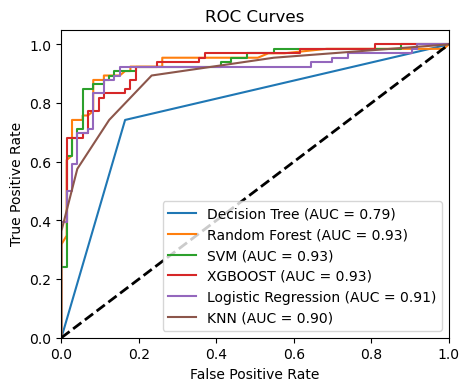

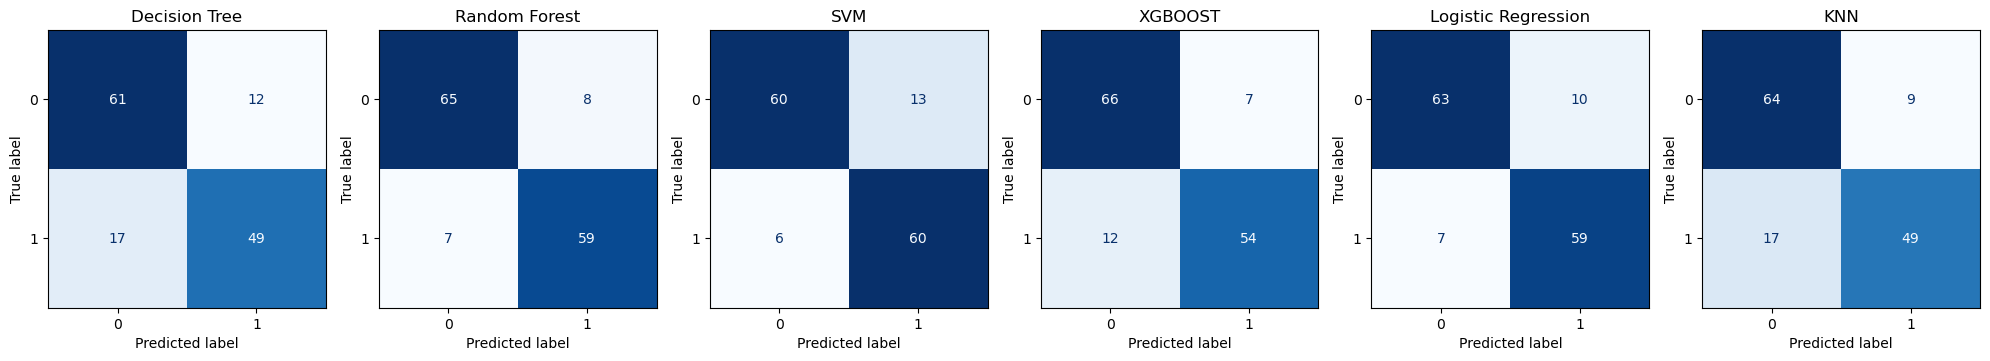

               Decision Tree  Random Forest       SVM   XGBOOST  \
Test Accuracy       0.791367       0.892086  0.863309  0.863309   

               Logistic Regression      KNN  
Test Accuracy             0.877698  0.81295  


In [37]:
# So KNN stops complaining
X_train_encoded = np.ascontiguousarray(X_train_encoded.values)
X_test_encoded = np.ascontiguousarray(X_test_encoded.values)


decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
xgboost = XGBClassifier()
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier()

models = {
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'SVM': svm,
    'XGBOOST': xgboost,
    'Logistic Regression': logistic_regression,
    'KNN': knn
}

cv_results = {}
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, X_train_encoded, y_train, cv=kf, scoring='accuracy')
    cv_results[name] = scores
    print(f'{name}: Mean Accuracy = {scores.mean():.3f}, Std = {scores.std():.3f}')

cv_results_df = pd.DataFrame(cv_results)
print(cv_results_df)

test_results = {}
roc_curves = {}

plt.figure(figsize=(5, 4))

for name, model in models.items():
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    accuracy = accuracy_score(y_test, y_pred)
    test_results[name] = accuracy
    print(f'{name} Test Accuracy: {accuracy:.3f}')
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_encoded)[:, 1]
    else:  # For SVM without probability=True
        y_prob = model.decision_function(X_test_encoded)
        
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_curves[name] = (fpr, tpr, roc_auc)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

fig, axes = plt.subplots(1, len(models), figsize=(20, 5))
for ax, (name, model) in zip(axes, models.items()):
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
    ax.set_title(name)

plt.tight_layout()
plt.show()

test_results_df = pd.DataFrame(test_results, index=['Test Accuracy'])
print(test_results_df)

In [38]:
rf_param_grid = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [None, 5, 10, 20, 40],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 3, 5],
    'bootstrap': [True, False]
}

random_forest = RandomForestClassifier(random_state=42)
rf_random_search = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=rf_param_grid,
    n_iter=100,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_random_search.fit(X_train_encoded, y_train)

rf_best_params = rf_random_search.best_params_
print(rf_random_search.best_params_)
print(rf_random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}
0.8786568386568387


In [39]:
rf_param_grid = {
    'n_estimators': [190, 200, 210],
    'max_features': ['log2'],
    'max_depth': [19, 20, 21],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [2, 3, 4],
    'bootstrap': [False]
}

rf_grid_search = GridSearchCV(
    estimator=random_forest,
    param_grid=rf_param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)

rf_grid_search.fit(X_train_encoded, y_train)

rf_best_params = rf_grid_search.best_params_
rf_best_model = rf_grid_search.best_estimator_
rf_test_accuracy = accuracy_score(y_test, rf_best_model.predict(X_test_encoded))
print(f'Random Forest Hyperparam Accuracy: {rf_test_accuracy}')

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Random Forest Hyperparam Accuracy: 0.8848920863309353


In [40]:
xgb_param_grid = {
    'n_estimators': [50, 300, 50],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'subsample': [0.4, 1, 0.1],
    'max_depth': [3, 10, 1],
    'min_child_weight': [1, 2, 3, 5, 7, 10],
    'gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
}

xgboost = XGBClassifier(random_state=42)

xgb_random_search = RandomizedSearchCV(
    estimator=xgboost,
    param_distributions=xgb_param_grid,
    n_iter=100,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

xgb_random_search.fit(X_train_encoded, y_train)

xgb_best_params = xgb_random_search.best_params_
print(xgb_random_search.best_params_)
print(xgb_random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'subsample': 1, 'n_estimators': 50, 'min_child_weight': 2, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.2}
0.8767403767403767


In [41]:
xgb_param_grid = {
    'n_estimators': [45, 50, 55],
    'learning_rate': [0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1],
    'max_depth': [9, 10, 11],
    'min_child_weight': [1, 2, 3],
    'gamma': [0.1, 0.2, 0.3],
}


xgb_grid_search = GridSearchCV(
    estimator=xgboost,
    param_grid=xgb_param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)

xgb_grid_search.fit(X_train_encoded, y_train)

xgb_best_params = xgb_grid_search.best_params_
xgb_best_model = xgb_grid_search.best_estimator_
xgb_test_accuracy = accuracy_score(y_test, xgb_best_model.predict(X_test_encoded))
print(f'XGBoost Hyperparam Accuracy: {xgb_test_accuracy}')

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
XGBoost Hyperparam Accuracy: 0.8561151079136691


In [42]:
lr_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 10, 0.1],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

logistic_regression = LogisticRegression(max_iter=500, random_state=42)

lr_random_search = RandomizedSearchCV(
    estimator=logistic_regression,
    param_distributions=lr_param_grid,
    n_iter=100,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

lr_random_search.fit(X_train_encoded, y_train)

lr_best_params = lr_random_search.best_params_
print(lr_random_search.best_params_)
print(lr_random_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'solver': 'lbfgs', 'penalty': 'none', 'C': 0.1}
0.8641769041769042


In [43]:
lr_param_grid = {
    'penalty': ['l2'],
    'C': [9.9, 10, 10.1],
    'solver': ['lbfgs']
}

lr_grid_search = GridSearchCV(
    estimator=logistic_regression,
    param_grid=lr_param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)

lr_grid_search.fit(X_train_encoded, y_train)

lr_best_params = lr_grid_search.best_params_
lr_best_model = lr_grid_search.best_estimator_
lr_test_accuracy = accuracy_score(y_test, lr_best_model.predict(X_test_encoded))
print(f'Logistic Regression Hyperparam Accuracy: {lr_test_accuracy}')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Logistic Regression Hyperparam Accuracy: 0.8705035971223022


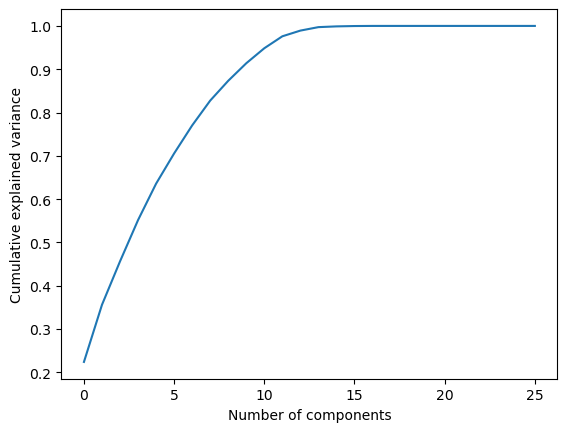

In [44]:
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train_encoded)
X_test_pca = pca.transform(X_test_encoded)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [45]:
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_encoded)
X_test_pca = pca.transform(X_test_encoded)

In [46]:
X_train_pca.shape

(552, 12)

In [47]:
xgb_grid_search.fit(X_train_pca, y_train)

xgb_best_params = xgb_grid_search.best_params_
xgb_best_model = xgb_grid_search.best_estimator_
xgb_test_pca_accuracy = accuracy_score(y_test, xgb_best_model.predict(X_test_pca))
print(f'XGBoost Hyperparam + PCA Accuracy: {xgb_test_pca_accuracy}')

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
XGBoost Hyperparam + PCA Accuracy: 0.8201438848920863


In [48]:
rf_grid_search.fit(X_train_pca, y_train)

rf_best_params = rf_grid_search.best_params_
rf_best_model = rf_grid_search.best_estimator_
rf_test_pca_accuracy = accuracy_score(y_test, rf_best_model.predict(X_test_pca))
print(f'Random Forest Hyperparam + PCA Accuracy: {rf_test_pca_accuracy}')

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Random Forest Hyperparam + PCA Accuracy: 0.841726618705036


In [53]:

lr_grid_search.fit(X_train_pca, y_train)

lr_best_params = lr_grid_search.best_params_
lr_best_model = lr_grid_search.best_estimator_
lr_test_pca_accuracy = accuracy_score(y_test, lr_best_model.predict(X_test_pca))
print(f'Logistic Regression Hyperparam + PCA Accuracy: {lr_test_pca_accuracy}')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Logistic Regression Hyperparam + PCA Accuracy: 0.8776978417266187


In [55]:
print('Baseline:')
print(test_results_baseline_df)


Baseline:
               Decision Tree  Random Forest       SVM   XGBOOST  \
Test Accuracy       0.778626       0.847328  0.839695  0.862595   

               Logistic Regression       KNN  
Test Accuracy             0.832061  0.793893  
Preprocessing:
               Decision Tree  Random Forest       SVM   XGBOOST  \
Test Accuracy       0.791367       0.892086  0.863309  0.863309   

               Logistic Regression      KNN  
Test Accuracy             0.877698  0.81295  


In [ ]:
print('Preprocessing:')
print(test_results_df)

In [56]:
print(f'Random Forest Hyperparam Accuracy: {rf_test_accuracy}')
print(f'Random Forest Hyperparam + PCA Accuracy: {rf_test_pca_accuracy}')
print(f'XGBoost Hyperparam Accuracy: {xgb_test_accuracy}')
print(f'XGBoost Hyperparam + PCA Accuracy: {xgb_test_pca_accuracy}')
print(f'Logistic Regression Hyperparam Accuracy: {lr_test_accuracy}')
print(f'Logistic Regression Hyperparam + PCA Accuracy: {lr_test_pca_accuracy}')

Random Forest Hyperparam Accuracy: 0.8848920863309353
Random Forest Hyperparam + PCA Accuracy: 0.8561151079136691
XGBoost Hyperparam Accuracy: 0.8561151079136691
XGBoost Hyperparam + PCA Accuracy: 0.8201438848920863
Logistic Regression Hyperparam Accuracy: 0.8705035971223022
Logistic Regression Hyperparam + PCA Accuracy: 0.8776978417266187
